# Import all libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

# Load data
1. Load your dataset. 

In [2]:
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data['MINIMUM_PAYMENTS'].fillna(value=data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(value=data['CREDIT_LIMIT'].mean(),inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
data.drop(["CUST_ID"],axis=1,inplace=True)

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Scaling data
#Scaling the data so that all the features become comparable.

#Normalizing the data so that the data approximately.


#follows a Gaussian distribution.

#Converting the numpy array into a pandas DataFrame.

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
normalized = normalize(scaled)
normalized = pd.DataFrame(normalized)

In [9]:
normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


# Dimension reduce
I search and find this function to reduce dimensions of the dataset by using Principal Component Analysis (PCA)

In [10]:
pca = PCA(n_components = 2)
principal = pca.fit_transform(normalized)
principal = pd.DataFrame(principal)

# Agglomerative clustering
2. Use hierarchical clustering to identify the inherent groupings within your data.

In [11]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(principal)
clust_labels

array([1, 0, 2, ..., 3, 1, 2], dtype=int64)

In [12]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,0
2,2
3,1
4,1
...,...
8945,3
8946,3
8947,3
8948,1


# Plot clusters
3. Plot the clusters. 

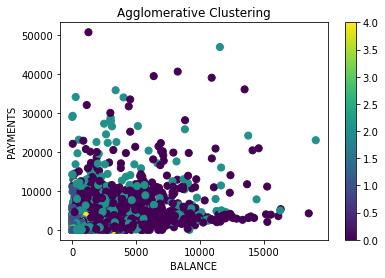

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(data["BALANCE"],data["PAYMENTS"],c=agglomerative[0],s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

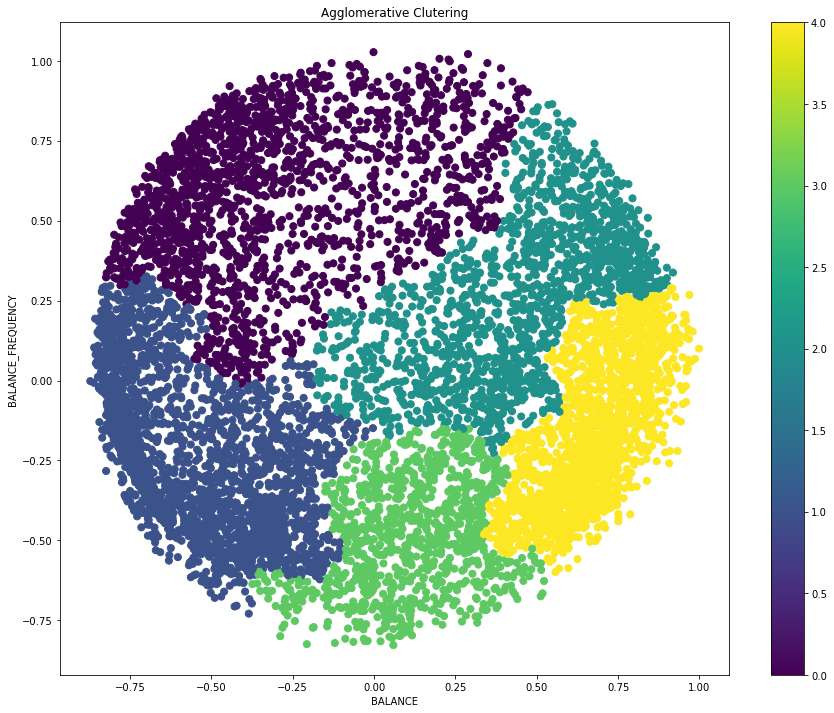

In [14]:
fig =plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
scatter = ax.scatter (principal[0] , principal[1] , c=agglomerative[0],s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)

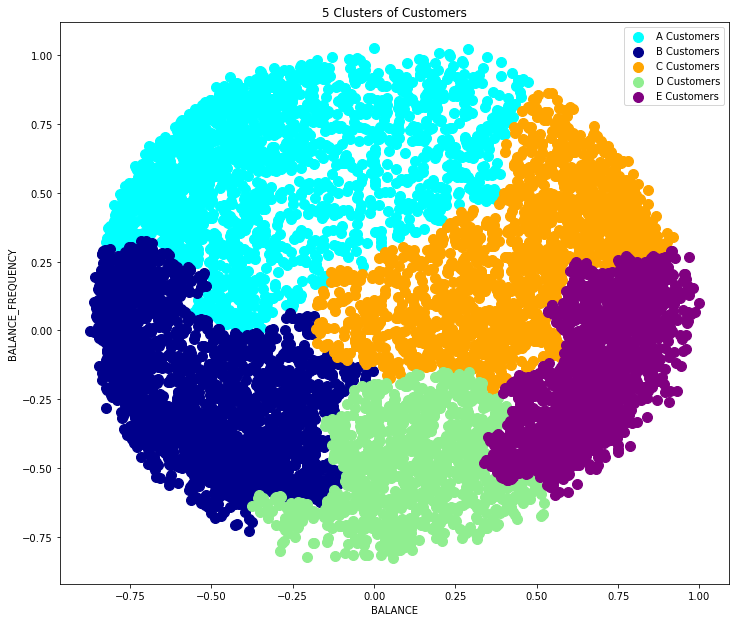

In [15]:
X = principal.iloc[:, [0,1]].values

plt.figure(figsize=(12, 10))
plt.subplots_adjust(bottom=0.1)

plt.scatter(X[clust_labels == 0, 0], X[clust_labels == 0, 1], s = 100, c = 'cyan', label = 'A Customers')
plt.scatter(X[clust_labels == 1, 0], X[clust_labels==1, 1], s = 100, c = 'darkblue', label = 'B Customers')
plt.scatter(X[clust_labels== 2, 0], X[clust_labels == 2, 1], s = 100, c = 'orange', label = 'C Customers')
plt.scatter(X[clust_labels == 3, 0], X[clust_labels==3, 1], s = 100, c = 'lightgreen', label = 'D Customers')
plt.scatter(X[clust_labels == 4, 0], X[clust_labels==4, 1], s = 100, c = 'purple', label = 'E Customers')
plt.title('5 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()

plt.show()

# Dendrogram
4.Plot the dendrogram. Use K-means clustering. 

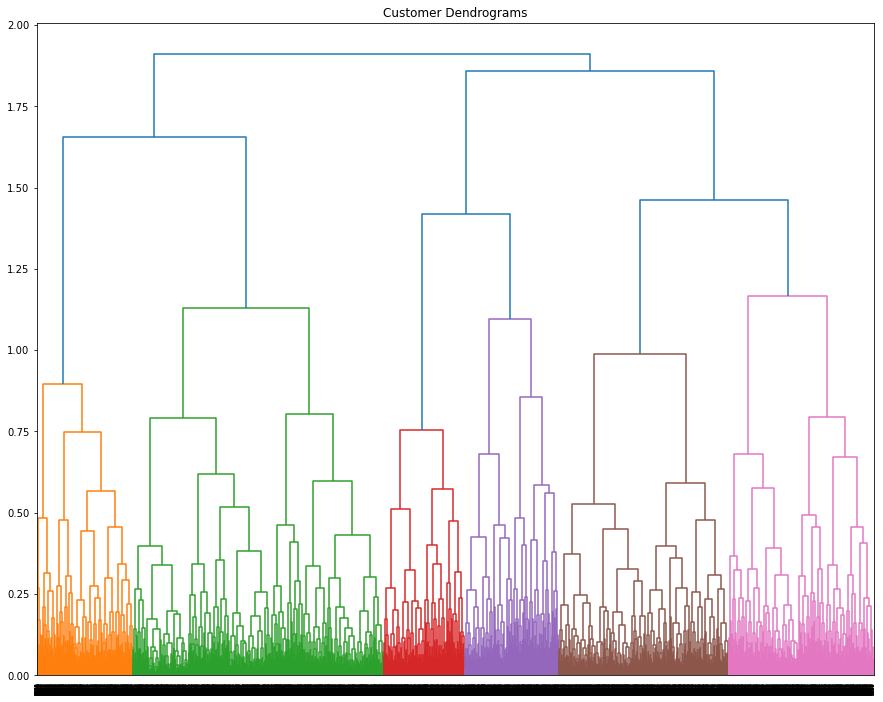

In [16]:
plt.figure(figsize=(15,12))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(principal,method="complete"))

In [17]:
kmeans_data=KMeans(n_clusters=5)  #Cluster our main data by choosing 5 as number of clusters
kmeans_data.fit(data)
labels_data=pd.DataFrame(kmeans_data.labels_)
labels_data
pred_data=kmeans_data.predict(data)

In [18]:
print(kmeans_data.cluster_centers_) 

[[4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [8.67045721e+02 8.53712519e-01 5.10380432e+02 2.48764008e+02
  2.61905115e+02 5.34004939e+02 4.49091868e-01 1.32314826e-01
  3.43845864e-01 1.14594004e-01 2.42044074e+00 9.54520215e+00
  2.34318613e+03 9.30916847e+02 5.49824804e+02 1.44513279e-01
  1.13855631e+01]
 [5.89820504e+03 9.70043776e-01 1.00057722e+03 5.78692075e+02
  4.21963634e+02 4.55055377e+03 3.78408081e-01 1.92865110e-01
  2.78923355e-01 3.92371420e-01 1.16037515e+01 1.58487691e+01
  9.71266652e+03 3.82420869e+03 2.07606596e+03 2.56569027e-02
  1.16119578e+01]
 [1.47020637e+03 8.99107078e-01 1.75056699e+03 1.11392472e+03
  6.37074849e+02 5.36154954e+02 6.30285249e-01 3.74625014e-01
  4.37649402e-01 8.50280908e-02 1.87401575e+00 2.39745252e+01
  7.72746010e+03

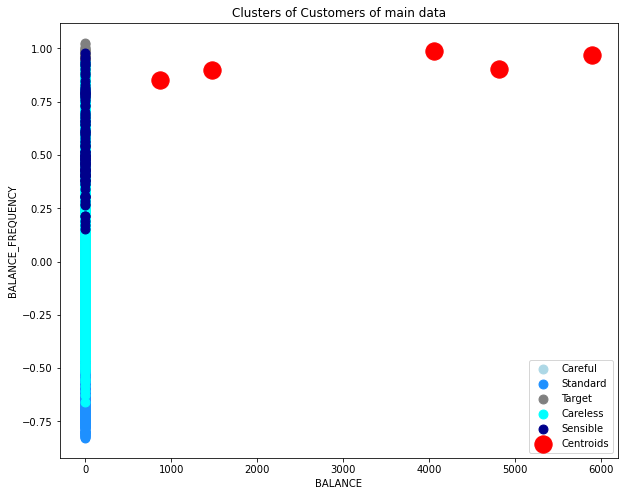

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(X[pred_data == 0, 0],
            X[pred_data == 0, 1],s=80,c='lightblue',label='Careful')
plt.scatter(X[pred_data == 1, 0],
            X[pred_data == 1, 1],s=80,c='dodgerblue',label='Standard')
plt.scatter(X[pred_data == 2, 0],
            X[pred_data == 2, 1],s=80,c='gray',label='Target')
plt.scatter(X[pred_data == 3, 0],
            X[pred_data == 3, 1],s=80,c='cyan',label='Careless')
plt.scatter(X[pred_data == 4, 0], 
            X[pred_data == 4, 1],s=80,c='darkblue',label='Sensible')

plt.scatter(kmeans_data.cluster_centers_[:, 0], kmeans_data.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers of main data')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()
plt.show()

In [20]:
kmeans_princ=KMeans(n_clusters=5)  #Cluster our principal data by choosing 5 as number of clusters
kmeans_princ.fit(principal)
labels_princ=pd.DataFrame(kmeans_princ.labels_)
labels_princ

,0
0,0
1,1
2,4
3,3
4,0
...,...
8945,2
8946,2
8947,2
8948,0


In [21]:
pred_princ=kmeans_princ.predict(principal)
print(kmeans_princ.cluster_centers_) 

[[-0.24029113 -0.4235242 ]
 [-0.34517523  0.61095836]
 [ 0.49877301 -0.28340569]
 [-0.66588284 -0.05507944]
 [ 0.58374169  0.33094235]]


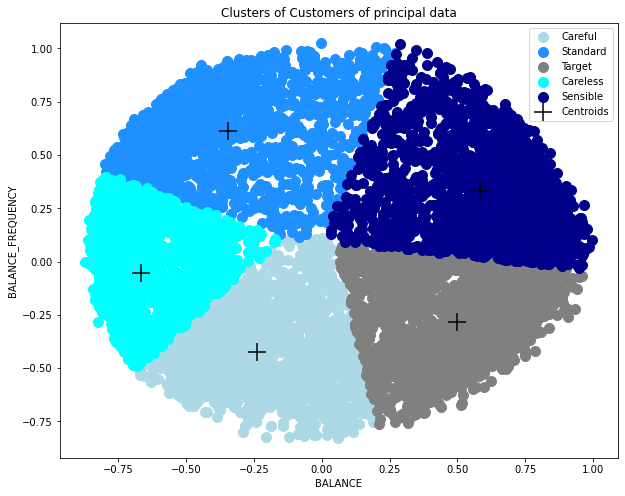

In [22]:
plt.figure(figsize=(10, 8))

plt.scatter(X[pred_princ == 0, 0],
            X[pred_princ == 0, 1], s = 100, c = 'lightblue', label = 'Careful')
plt.scatter(X[pred_princ == 1, 0],
            X[pred_princ == 1, 1], s = 100, c = 'dodgerblue', label = 'Standard')
plt.scatter(X[pred_princ == 2, 0],
            X[pred_princ == 2, 1], s = 100, c = 'gray', label = 'Target')
plt.scatter(X[pred_princ == 3, 0],
            X[pred_princ == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[pred_princ == 4, 0],
            X[pred_princ == 4, 1], s = 100, c = 'darkblue', label = 'Sensible')

plt.scatter(kmeans_princ.cluster_centers_[:, 0], kmeans_princ.cluster_centers_[:, 1], s=300,marker ='+', c='black', label = 'Centroids')
plt.title('Clusters of Customers of principal data')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()


# Elbow method
5.Try different K values and select the best one.

In [23]:
# Elbow method of main data
Sum_of_squared_distances=[]
bestK = range(1,15)
for k in bestK:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

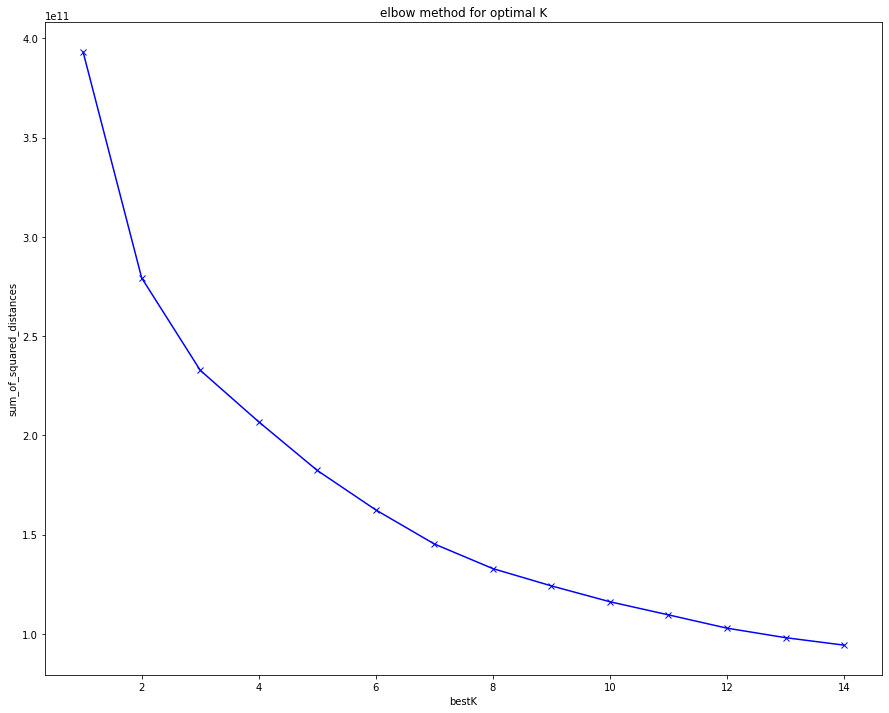

In [24]:
plt.figure(figsize=(15,12))
plt.plot(bestK,Sum_of_squared_distances,'bx-')
plt.xlabel('bestK')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal K')
plt.show()

In [25]:
#Elbow method of principal data
Sum_of_squared_distances1=[]
bestK1 = range(1,15)
for k1 in bestK1:
    km1=KMeans(n_clusters=k1)
    km1=km1.fit(principal)
    Sum_of_squared_distances1.append(km1.inertia_)

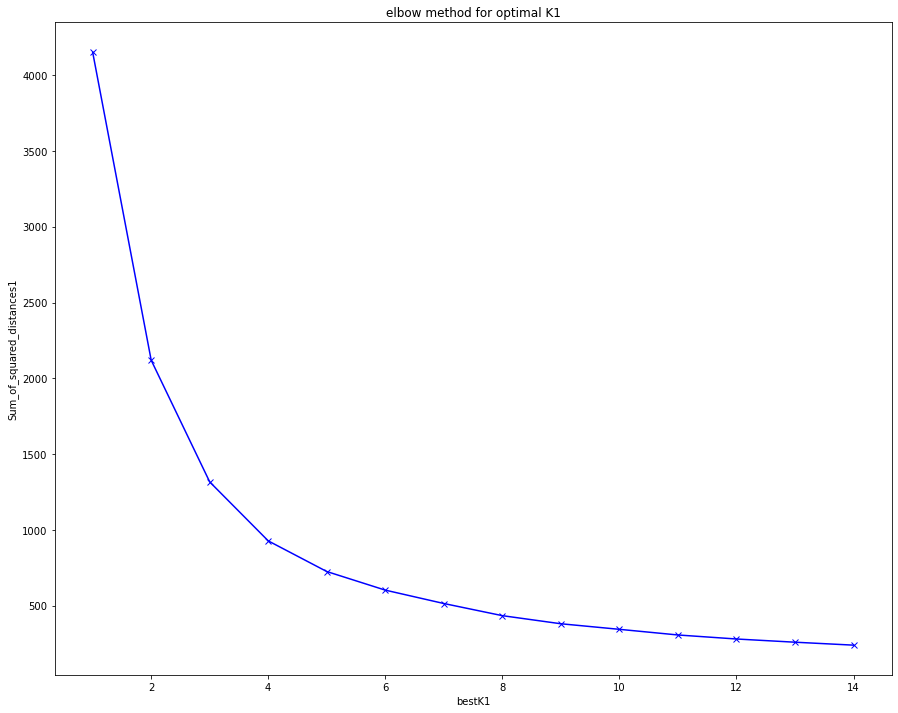

In [26]:
plt.figure(figsize=(15,12))
plt.plot(bestK1,Sum_of_squared_distances1,'bx-')
plt.xlabel('bestK1')
plt.ylabel('Sum_of_squared_distances1')
plt.title('elbow method for optimal K1')
plt.show()

# Plot clusters using Elbow
6.Plot the clusters. 

 the use of the elbow method gives us an optimal k, here according to the decreasing function of the error, I chose k=4 or 5 ,.the algorithm of k_means clustering gives a rate of error clearly lower than with a k=4 or 5 

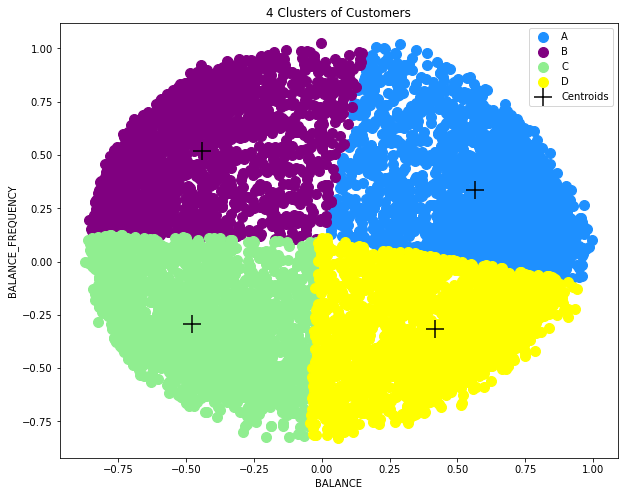

In [27]:
kmeans=KMeans(n_clusters=4)  
kmeans.fit(principal)
pred=kmeans.predict(principal)

plt.figure(figsize=(10, 8))

plt.scatter(X[pred == 0, 0],
            X[pred == 0, 1], s = 100, c = 'dodgerblue', label = 'A')
plt.scatter(X[pred == 1, 0],
            X[pred == 1, 1], s = 100, c = 'purple', label = 'B')
plt.scatter(X[pred == 2, 0],
            X[pred == 2, 1], s = 100, c = 'lightgreen', label = 'C')
plt.scatter(X[pred == 3, 0],
            X[pred == 3, 1], s = 100, c = 'yellow', label = 'D')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], marker ='+', s=300, c='black', label = 'Centroids')
plt.title('4 Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.legend()

# Another validation metric
I'll choose the Spectral Clustering & I'll test this metric & compare with Hierarchical & Kmeans Clustering

In [28]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [29]:
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize',random_state=40)
spectralC = spectral.fit_predict(principal)
spectralC

array([2, 0, 1, ..., 1, 2, 0], dtype=int64)

In [30]:
hierarchical_ = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit_predict(principal)
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit_predict(principal)
spectral_ = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='discretize', random_state=40).fit_predict(principal)


In [31]:
kmeans_Silhouette_Score = metrics.silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(X, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score = metrics.silhouette_score(X, spectral_, metric='euclidean')

In [32]:
Clustering_Silhouette_Scores = [['KMeans',kmeans_Silhouette_Score],['Hierarchical',Hierarchical_Silhouette_Score], ['Spectral', Spectral_Silhouette_Score]]
Clustering_Silhouette_Scores = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.458470
2,Spectral,0.443844
1,Hierarchical,0.412584


# Kmean clustering still the best model 